In [1]:
from sklearn.manifold import TSNE
from rdkit.Chem.AllChem import GetMorganFingerprint,GetHashedMorganFingerprint
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
from rdkit.Chem import MolFromSmiles

def mols_to_X(mols,n_bits=2048,fpr=2):
    X=np.empty((len(mols),n_bits))
    for i in range(len(mols)):
        fp=GetHashedMorganFingerprint(mols[i],fpr,n_bits)
        arr=np.zeros((0,), dtype=np.int8)
        ConvertToNumpyArray(fp,arr)
        X[i,:]=arr
    return X

In [5]:
qm_X=[]
qm_smiles=pd.read_csv("./QM9/QM9.csv").sample(1500).iloc[:,0].values
for s in qm_smiles:
    qm_X.append(MolFromSmiles(s))

opv_X=[]
opv_smiles=pd.read_csv("./OPV/train.csv").sample(1500).iloc[:,1].values
for s in opv_smiles:
    opv_X.append(MolFromSmiles(s))


total_X=qm_X+opv_X
total_X=mols_to_X(total_X)
tsne=TSNE(n_components=2, learning_rate='auto',random_state=1222)
new_X=tsne.fit_transform(total_X)

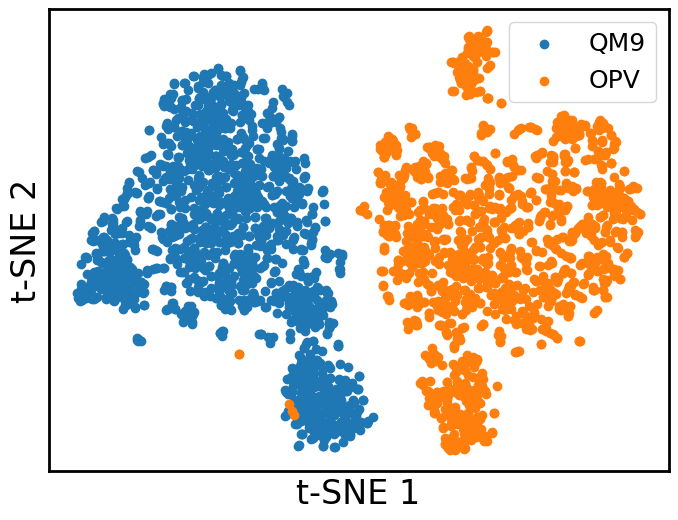

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.scatter(new_X[:1500,0],new_X[:1500,1],label="QM9")
plt.scatter(new_X[1500:,0],new_X[1500:,1],label="OPV")

plt.yticks([],fontsize=20)
plt.xticks([],fontsize=20)
plt.ylabel("t-SNE 2",fontsize=24)
plt.xlabel("t-SNE 1",fontsize=24)
plt.legend(fontsize=18)

bwidth=2
plt.tick_params(which="major",width=bwidth,length=5)
plt.tick_params(which="minor",width=bwidth,length=3)
tk=plt.gca()
tk.spines["bottom"].set_linewidth(bwidth)
tk.spines["top"].set_linewidth(bwidth)
tk.spines["left"].set_linewidth(bwidth)
tk.spines["right"].set_linewidth(bwidth)
plt.show()

In [2]:
from rdkit.Chem import MolFromSmiles
a=MolFromSmiles("c1ccccc1")
a.GetRingInfo().NumRings()

1

In [3]:
from tqdm import tqdm
qm_smiles=pd.read_csv("./QM9/QM9.csv").iloc[:,0].values
qm_elements=[]
qm_natom=[]
qm_nring=[]
for i in tqdm(range(qm_smiles.shape[0])):
    cur_mol=MolFromSmiles(qm_smiles[i])
    qm_nring.append(cur_mol.GetRingInfo().NumRings())
    natom=0
    for atom in list(cur_mol.GetAtoms()):
        if atom.GetSymbol()!="H":
            natom+=1
            if atom.GetSymbol() not in qm_elements:
                qm_elements.append(atom.GetSymbol())
    qm_natom.append(natom)

100%|████████████████████████████████████████████████████████████████████████| 133247/133247 [00:16<00:00, 8099.79it/s]


In [4]:
from tqdm import tqdm
opv_smiles=pd.read_csv("./OPV/OPV.csv").iloc[:,1].values
opv_elements=[]
opv_natom=[]
opv_nring=[]
for i in tqdm(range(opv_smiles.shape[0])):
    cur_mol=MolFromSmiles(opv_smiles[i])
    natom=0
    opv_nring.append(cur_mol.GetRingInfo().NumRings())
    for atom in list(cur_mol.GetAtoms()):
        if atom.GetSymbol()!="H":
            natom+=1
            if atom.GetSymbol() not in opv_elements:
                opv_elements.append(atom.GetSymbol())
    opv_natom.append(natom)

100%|██████████████████████████████████████████████████████████████████████████| 90823/90823 [00:52<00:00, 1746.02it/s]


In [10]:
max(opv_natom)

122

In [50]:
zinc_elements,qm_elements,opv_elements

(['C', 'O', 'N', 'F', 'S', 'Cl', 'Br', 'I', 'P'],
 ['C', 'N', 'O', 'F'],
 ['C', 'O', 'S', 'F', 'Si', 'N', 'P'])

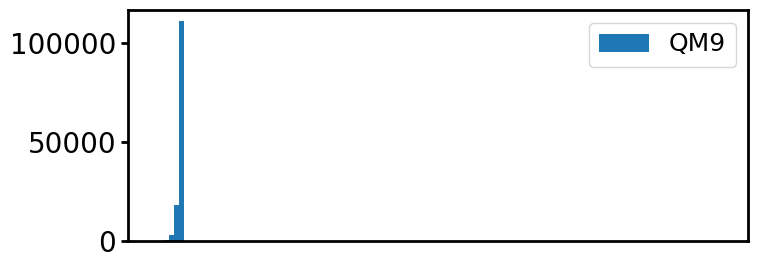

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3))
plt.hist(qm_natom,label="QM9")

plt.xlim(0,100)
plt.yticks([0,50000,100000],fontsize=20)
plt.xticks([],fontsize=20)
plt.legend(fontsize=18,loc=1)
plt.xlim(0,100)

bwidth=2
plt.tick_params(which="major",width=bwidth,length=5)
plt.tick_params(which="minor",width=bwidth,length=3)
tk=plt.gca()
tk.spines["bottom"].set_linewidth(bwidth)
tk.spines["top"].set_linewidth(bwidth)
tk.spines["left"].set_linewidth(bwidth)
tk.spines["right"].set_linewidth(bwidth)
plt.show()

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3))
plt.hist(zinc_natom,color="tab:orange",label="ZINC250k")

plt.yticks([30000,60000],fontsize=20)
plt.xticks([],fontsize=20)
plt.legend(fontsize=18,loc=1)
plt.xlim(0,100)
plt.ylabel("Count",fontsize=24)

bwidth=2
plt.tick_params(which="major",width=bwidth,length=5)
plt.tick_params(which="minor",width=bwidth,length=3)
tk=plt.gca()
tk.spines["bottom"].set_linewidth(bwidth)
tk.spines["top"].set_linewidth(bwidth)
tk.spines["left"].set_linewidth(bwidth)
tk.spines["right"].set_linewidth(bwidth)
plt.show()

NameError: name 'zinc_natom' is not defined

<Figure size 800x300 with 0 Axes>

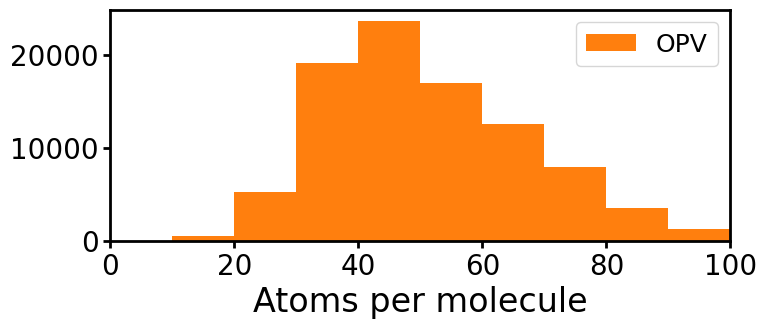

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3))
plt.hist(opv_natom,color="tab:orange",label="OPV",range=(0,100))

plt.xlim(0,100)
plt.yticks([0,10000,20000],fontsize=20)
plt.xticks(fontsize=20)
plt.legend(fontsize=18,loc=1)
plt.xlabel("Atoms per molecule",fontsize=24)

bwidth=2
plt.tick_params(which="major",width=bwidth,length=5)
plt.tick_params(which="minor",width=bwidth,length=3)
tk=plt.gca()
tk.spines["bottom"].set_linewidth(bwidth)
tk.spines["top"].set_linewidth(bwidth)
tk.spines["left"].set_linewidth(bwidth)
tk.spines["right"].set_linewidth(bwidth)
plt.show()

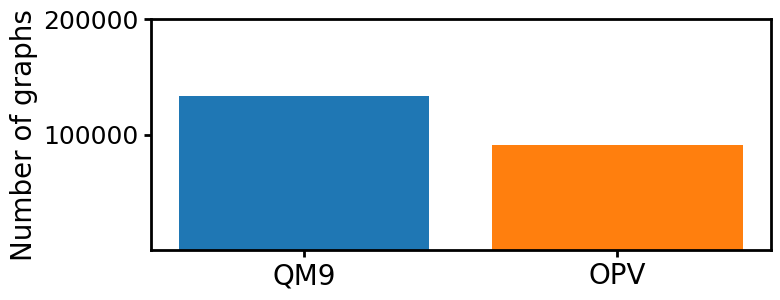

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3))
plt.bar([0],[qm_smiles.shape[0]],label="QM9")
#plt.bar([1],zinc_smiles.shape[0],label="ZINC250k")
plt.bar([1],opv_smiles.shape[0],label="OPV")

plt.yticks([100000,200000],fontsize=18)
plt.xticks([0,1],["QM9","OPV"],fontsize=20)
#plt.legend(fontsize=18,loc=1)
plt.ylabel("Number of graphs",fontsize=20)

bwidth=2
plt.tick_params(which="major",width=bwidth,length=5)
plt.tick_params(which="minor",width=bwidth,length=3)
tk=plt.gca()
tk.spines["bottom"].set_linewidth(bwidth)
tk.spines["top"].set_linewidth(bwidth)
tk.spines["left"].set_linewidth(bwidth)
tk.spines["right"].set_linewidth(bwidth)
plt.show()

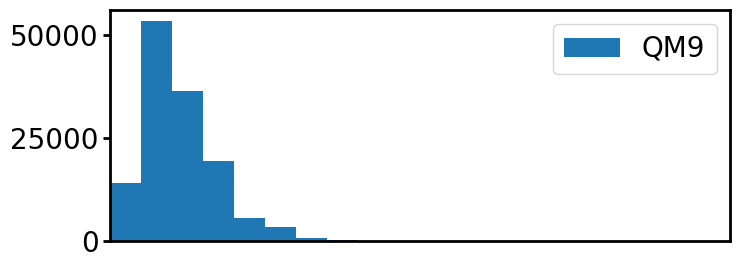

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3))
plt.hist(qm_nring,range=(0,20),bins=20,label="QM9")

plt.yticks([0,25000,50000],fontsize=20)
plt.xticks([])
plt.xlim(0,20)
#plt.xlabel("Rings per molecule",fontsize=20)
plt.legend(fontsize=20)

bwidth=2
plt.tick_params(which="major",width=bwidth,length=5)
plt.tick_params(which="minor",width=bwidth,length=3)
tk=plt.gca()
tk.spines["bottom"].set_linewidth(bwidth)
tk.spines["top"].set_linewidth(bwidth)
tk.spines["left"].set_linewidth(bwidth)
tk.spines["right"].set_linewidth(bwidth)
plt.show()

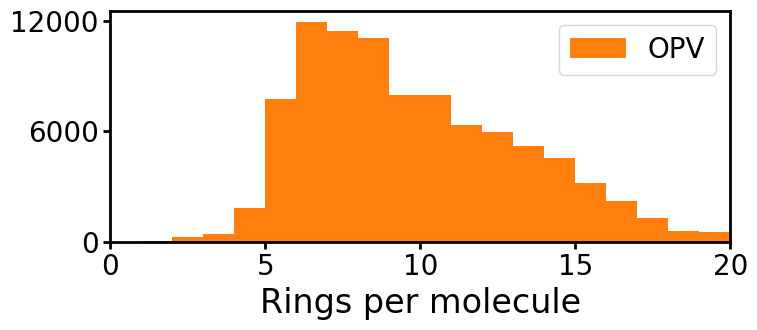

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3))
plt.hist(opv_nring,range=(0,20),bins=20,label="OPV",color="tab:orange")

plt.xlim(0,20)
plt.yticks([0,6000,12000],fontsize=20)
plt.xticks([0,5,10,15,20],fontsize=20)
plt.xlabel("Rings per molecule",fontsize=24)
plt.legend(fontsize=20)

bwidth=2
plt.tick_params(which="major",width=bwidth,length=5)
plt.tick_params(which="minor",width=bwidth,length=3)
tk=plt.gca()
tk.spines["bottom"].set_linewidth(bwidth)
tk.spines["top"].set_linewidth(bwidth)
tk.spines["left"].set_linewidth(bwidth)
tk.spines["right"].set_linewidth(bwidth)
plt.show()

In [109]:
qm_smiles.shape[0],zinc_smiles.shape[0],opv_smiles.shape[0]

(133247, 249455, 90823)

In [111]:
np.array(zinc_natom).mean()

23.151361969092623

In [112]:
np.array(opv_natom).mean()

50.618863063320966